In [8]:
import sys
# Appending python modules so we can run simulations
sys.path.append("../python")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import stimuli_generation
import os
from utility import load_scene
from pymunk.vec2d import Vec2d
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import isnan
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
from itertools import chain
from matplotlib.pyplot import figure
from statannot import add_stat_annotation
from scipy.stats import levene

In [2]:
# Experiment 1
data_path_exp1 = "../experiments/experiment3/data/cleaned_data.json"

In [4]:
data_exp1 = pd.read_json(data_path_exp1)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

low v.s. med: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.939e-34 U_stat=1.701e+05
med v.s. high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.066e-07 U_stat=2.184e+05
low v.s. high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.719e-69 U_stat=1.233e+05


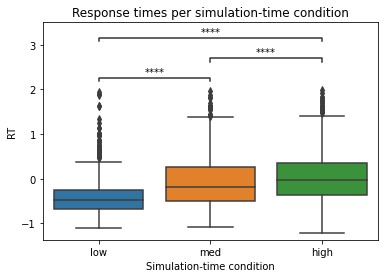

In [15]:
df = data_exp1
x = "sim_time"
y = "zrt"
order = ['low','med','high']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, 
                                   data=df, 
                                   x=x, 
                                   y=y, 
                                   order=order,
                                   box_pairs=[("low", "med"), 
                                              ("med", "high"), 
                                              ("low", "high")],
                                   test='Mann-Whitney', 
                                   text_format='star',
                                   loc='inside', 
                                   verbose=2)
plt.title("Response times per simulation-time condition")
plt.ylabel("RT")
plt.xlabel("Simulation-time condition")
test_results;

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

yessp v.s. nosp: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.438e-59 U_stat=3.571e+05


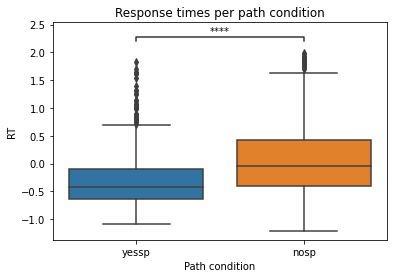

In [14]:
df = data_exp1
x = "straight_path"
y = "zrt"
order = ['yessp','nosp']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                                   box_pairs=[("yessp", "nosp")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=2)
plt.title("Response times per path condition")
plt.ylabel("RT")
plt.xlabel("Path condition")
test_results;

In [35]:
# Simulation Values
sim_vals = pd.read_json("../data/model/pilot3/simulation_vals.json")#,converters=conv)
sim_vals = sim_vals.rename(columns={'name':'scene'})
sim_vals = sim_vals[['scene','ticks']]
sim_vals['tick_mean'] = sim_vals.ticks.apply(lambda x: np.mean(x))
sim_vals['tick_std'] = sim_vals.ticks.apply(lambda x: np.std(x))
clean_responses = data_exp1.merge(sim_vals, on='scene')

In [37]:
df = clean_responses.groupby('scene').rt.apply(np.mean)
clean_responses['avg_rt'] = np.nan
for avg_rt,scene in zip(df,df.index):
    clean_responses.loc[clean_responses['scene']==scene,'avg_rt'] = avg_rt

In [42]:
clean_responses['rt_z'] = clean_responses.avg_rt.transform(lambda x: (x-x.mean())/x.std())

In [43]:
clean_responses['sim_time_z'] = clean_responses.tick_mean.transform(lambda x: (x-x.mean())/x.std())

<Figure size 5400x5400 with 0 Axes>

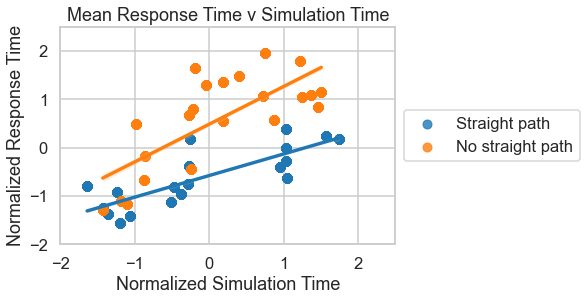

In [139]:
figure(figsize=(18, 18), dpi=300);
fig, ax = plt.subplots()
sns.set_context("talk")
sns.regplot(x='sim_time_z',y='rt_z', data=clean_responses[clean_responses.straight_path == 'yessp'], label="Straight path",ax=ax)
sns.regplot(x='sim_time_z',y='rt_z', data=clean_responses[clean_responses.straight_path == 'nosp'],label="No straight path", ax=ax)
ax.set_xlim(-2, 2.5)
ax.set_ylim(-2, 2.5)
ax.set(xlabel='Normalized Simulation Time', ylabel='Normalized Response Time')
ax.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5))
ax.set_title("Mean Response Time v Simulation Time")

plt.show()

In [137]:
sim_time_z = np.linspace(-1,2,50)
# sim_time_z *= 20
sim_time_z = map(lambda x: x*np.random.normal(1,0.1), sim_time_z)
rt_z = np.linspace(-1,2,50)
# rt_z *= 20
rt_z = map(lambda x: x*np.random.normal(1,0.1), rt_z)
df1 = {"sim_time_z":sim_time_z,'rt_z':rt_z}
df1 = pd.DataFrame.from_dict(df1)

sim_time_z = np.linspace(-1,2,50)
# sim_time_z *= 20
sim_time_z = map(lambda x: x*np.random.normal(1,0.1), sim_time_z)
rt_z = np.linspace(-1,2,50)
# rt_z *= 20
rt_z = list(map(lambda x: x*np.random.normal(1,0.1), rt_z))
df2 = {"sim_time_z":sim_time_z,'rt_z':rt_z}
df2 = pd.DataFrame.from_dict(df2)

<Figure size 5400x5400 with 0 Axes>

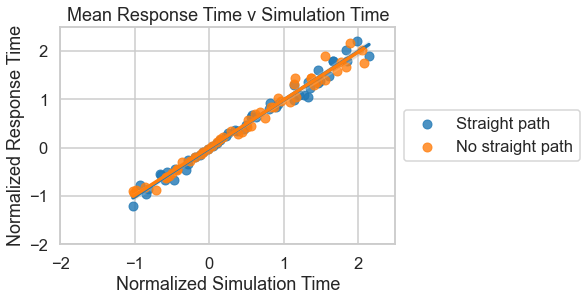

In [138]:
figure(figsize=(18, 18), dpi=300);
fig, ax = plt.subplots()
sns.set_context("talk")
sns.regplot(x='sim_time_z',y='rt_z', data=df1, label="Straight path",ax=ax)
sns.regplot(x='sim_time_z',y='rt_z', data=df2,label="No straight path", ax=ax)
ax.set_xlim(-2, 2.5)
ax.set_ylim(-2, 2.5)
ax.set(xlabel='Normalized Simulation Time', ylabel='Normalized Response Time')
ax.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5))
ax.set_title("Mean Response Time v Simulation Time")

plt.show()

In [131]:
sim_time_z = np.linspace(-1,2,50)
# sim_time_z *= 20
sim_time_z = map(lambda x: x*np.random.normal(1,0.1), sim_time_z)
rt_z = [0.1]*50
# rt_z *= 20
rt_z = map(lambda x: x*np.random.normal(1,0.1), rt_z)
df1 = {"sim_time_z":sim_time_z,'rt_z':rt_z}
df1 = pd.DataFrame.from_dict(df1)

sim_time_z = np.linspace(-1,2,50)
# sim_time_z *= 20
sim_time_z = map(lambda x: x*np.random.normal(1,0.1), sim_time_z)
rt_z = [0.1]*50
# rt_z *= 20
rt_z = list(map(lambda x: x*np.random.normal(1,0.1), rt_z))
df2 = {"sim_time_z":sim_time_z,'rt_z':rt_z}
df2 = pd.DataFrame.from_dict(df2)

<Figure size 5400x5400 with 0 Axes>

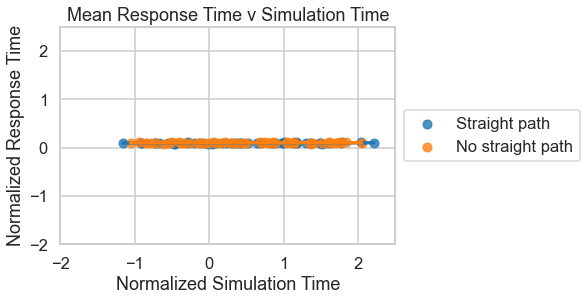

In [132]:
figure(figsize=(18, 18), dpi=300);
fig, ax = plt.subplots()
sns.set_context("talk")
sns.regplot(x='sim_time_z',y='rt_z', data=df1, label="Straight path",ax=ax)
sns.regplot(x='sim_time_z',y='rt_z', data=df2,label="No straight path", ax=ax)
ax.set_xlim(-2, 2.5)
ax.set_ylim(-2, 2.5)
ax.set(xlabel='Normalized Simulation Time', ylabel='Normalized Response Time')
ax.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5))
ax.set_title("Mean Response Time v Simulation Time")

plt.show()

In [133]:
sim_time_z = np.linspace(-1,2,50)
sim_time_z = map(lambda x: x*np.random.normal(1,0.1), sim_time_z)
rt_z = [0.1]*50
rt_z = map(lambda x: x*np.random.normal(1,0.1), rt_z)
df1 = {"sim_time_z":sim_time_z,'rt_z':rt_z}
df1 = pd.DataFrame.from_dict(df1)

sim_time_z = np.linspace(-1,2,50)
sim_time_z = list(map(lambda x: x*np.random.normal(1,0.1), sim_time_z))
rt_z = [x * np.random.normal(1,0.1) for x in sim_time_z]
# rt_z = list(map(lambda x: x*np.random.normal(1,0.1), rt_z))
df2 = {"sim_time_z":sim_time_z,'rt_z':rt_z}
df2 = pd.DataFrame.from_dict(df2)

<Figure size 5400x5400 with 0 Axes>

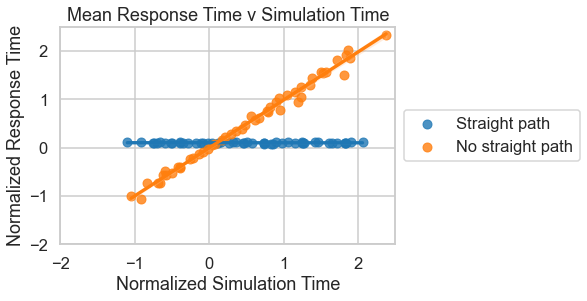

In [134]:
figure(figsize=(18, 18), dpi=300);
fig, ax = plt.subplots()
sns.set_context("talk")
sns.regplot(x='sim_time_z',y='rt_z', data=df1, label="Straight path",ax=ax)
sns.regplot(x='sim_time_z',y='rt_z', data=df2,label="No straight path", ax=ax)
ax.set_xlim(-2, 2.5)
ax.set_ylim(-2, 2.5)
ax.set(xlabel='Normalized Simulation Time', ylabel='Normalized Response Time')
ax.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5))
ax.set_title("Mean Response Time v Simulation Time")

plt.show()

<Figure size 5400x5400 with 0 Axes>

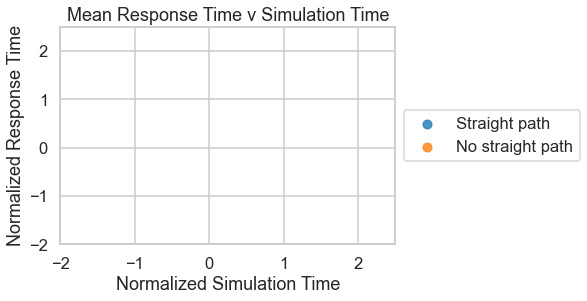

In [136]:
figure(figsize=(18, 18), dpi=300);
fig, ax = plt.subplots()
sns.set_context("talk")
sns.regplot(x=[],y=[], data=df1, label="Straight path",ax=ax)
sns.regplot(x=[],y=[], data=df2,label="No straight path", ax=ax)
ax.set_xlim(-2, 2.5)
ax.set_ylim(-2, 2.5)
ax.set(xlabel='Normalized Simulation Time', ylabel='Normalized Response Time')
ax.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5))
ax.set_title("Mean Response Time v Simulation Time")

plt.show()

In [128]:
# Model Values
split = pd.DataFrame()
models = pd.read_json("../data/model/pilot3/models.json")
for m in ['abstraction']:
    split = pd.concat([split, pd.DataFrame(models[m].tolist(),columns=[f'{m}_collision_prob',
                                                                       f'{m}_samples',
                                                                       f'{m}_ticks'])],axis=1)
models = pd.concat([models['name'], split],axis=1)
models = models.rename(columns={'name':'scene'});

# Compute stats over ticks
for m in ['abstraction']:
    models[f'{m}_tick_mean'] = models[f'{m}_ticks'].apply(np.mean)
    
clean_responses = clean_responses.merge(models, on='scene')

formula = 'rt ~ abstraction_tick_mean'

# Ordinary linear models based on path condition
model_sp = ols(formula, clean_responses[clean_responses.straight_path == 'yessp']).fit()
model_nosp = ols(formula, clean_responses[clean_responses.straight_path == 'nosp']).fit()

Text(0.5, 1.0, 'Longer simulation does not mean \n longer response times')

<Figure size 2400x1800 with 0 Axes>

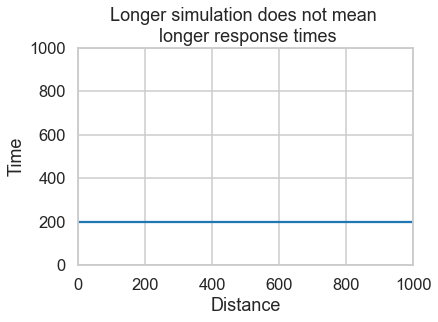

In [142]:
data = {"Time":[200]*1000,"Distance":list(range(1000))}
df = pd.DataFrame.from_dict(data)

sns.set_context("talk")
figure(figsize=(8, 6), dpi=300);
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.set_palette("tab10")
sns.lineplot(data=df,x="Distance",y="Time",ax=ax)
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)
plt.title("Longer simulation does not mean \n longer response times")

In [3]:
data_path_exp2 = "./cleaned_data_exp_4_5_6.json"

In [5]:
data_exp2 = pd.read_json(data_path_exp2)